### <font color = 'purple'> Model Building and Deployment with Gradio

##### Task 1:

Use the `daily bike-sharing` data to implement the following:

    - Train a model to predict the total rentals for any given day.
    - Implement gradio to serve the model in production.


##### Task 2:

Use the `bike share` data to implement the following:

    - A model that predict the number of Registered and Casual rentals each day.
    - A classification model to predict binned values of rentals each day. Take bin as Low, Medium_Low, Medium_High and High.
    - Implement gradio to serve the models.


`Solution Prepared by` : `Olanrewaju Adegoke`

`Email` : Larrysman2004@yahoo.com

In this project, I explore various techniques in wrangling the daily bike share and bike share datasets. I performed deep insights in exploratory data analysis to identify and detect patterns which are useful to gain insights to the behavior of the datasets.

###### Paths to the folders

In [1]:
main_path = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\bike_rentge_cost_prediction_project'
data_path = '../data'
model_path = '../models'
note_path = '../notebooks'
visual_path = '../visuals'
output_path = '../outputs'
resource_path = '../resources'

###### Import necessary libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

###### Import self-built customizable ML modules

In [3]:
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\bike_rentge_cost_prediction_project\\notebooks'

In [4]:
os.chdir(resource_path)
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\bike_rentge_cost_prediction_project\\resources'

In [5]:
import olanrewaju as ola

In [6]:
os.chdir(note_path)
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\bike_rentge_cost_prediction_project\\notebooks'

###### Load the datasets

In [7]:
help(ola.file_load_v4)

Help on function file_load_v4 in module olanrewaju:

file_load_v4(main_path, file_path, file_name, file_format)
    This is a file loader function that implements file I/O for the following file formats:
        1. .csv
        2. xlsx or xls
    Inputs:
        order: (main_path, file_path, file_name, file_format)
        main_path: This is the string directory to file location. It is the parent folder that contain the folder that housed the dataset.
        file_path: This is the path to the directory that housed the data written out in string.
        file_name: This is the name of the data or file without the file extension and must be in string also.
        file_format: This is the format of the file you are trying to upload. It can be a csv, xlsx or xls.
                     Please do not add the '.' at the prefix or suffix of any of the file format.

    Outputs:
        The function returns a pandas DataFrame.
        Remember to create a container for the outputs.



In [8]:
main_path = main_path
file_path = 'data'
file_name = 'daily-bike-share'
file_format = 'csv'
daily_bike = ola.file_load_v4(main_path, file_path, file_name, file_format)
daily_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [9]:
main_path = main_path
file_path = 'data'
file_name = 'bike-share'
file_format = 'csv'
bike_share = ola.file_load_v4(main_path, file_path, file_name, file_format)
bike_share.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### <font color = 'purple'> Task 1

- Train a model to predict the total rentals for any given day.
- Implement gradio to serve the model in production.

In [10]:
df_daily = daily_bike.copy()

In [11]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [12]:
df_daily.shape

(731, 14)

In [13]:
df_daily.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000


There is a problem of extremity and standardization in the dataset.

###### Check for missing values

In [14]:
df_daily.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
rentals       0
dtype: int64

###### Check for duplicate entries

In [15]:
df_daily.duplicated().sum()

0

In [16]:
df_daily.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131


###### Peeking through the data to check if `yr, mnth, weekday` are properly extracted from `dteday`

In [17]:
list(df_daily.columns)

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'rentals']

In [18]:
type(df_daily['dteday'].iloc[0])

str

In [19]:
df_daily.yr.unique()

array([0, 1], dtype=int64)

In [20]:
df_daily.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [21]:
df_daily.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [22]:
df_daily.workingday.unique()

array([0, 1], dtype=int64)

In [23]:
df_daily.holiday.unique()

array([0, 1], dtype=int64)

In [24]:
df_daily.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [25]:
df_daily.dteday.max()

'9/9/2012'

In [26]:
df_daily.dteday.min()

'1/1/2011'

In [27]:
df_daily.weathersit.unique()

array([2, 1, 3], dtype=int64)

###### Features Engineering

There is need to extract key features from the `dteday` column.

In [28]:
df_daily['timestamp'] = pd.to_datetime(df_daily['dteday'])

In [29]:
df_daily.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,timestamp
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,2011-01-01
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2011-01-02


##### Extract `day, year` from timestamp

In [30]:
df_daily['day'] = df_daily['timestamp'].apply(lambda day: day.day)

In [31]:
df_daily.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,timestamp,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,2011-01-01,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2011-01-02,2


In [32]:
df_daily['year'] = df_daily['timestamp'].apply(lambda year: year.year)

In [33]:
df_daily.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,timestamp,day,year
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,2011-01-01,1,2011
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2011-01-02,2,2011


In [34]:
list(df_daily.columns)

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'rentals',
 'timestamp',
 'day',
 'year']

###### Select useful columns

In [35]:
unwanted_cols = ['instant', 'dteday', 'yr', 'timestamp']

In [36]:
help(ola.dropping_columns)

Help on function dropping_columns in module olanrewaju:

dropping_columns(file, columns)
    This function is used to drop unwanted columns in a dataset and returns a dataframe which is not having the unwanted columns.
    This uses the inplace=True method and returns the same dataset but without the unwanted column/columns.
    Inputs:
        file: This is the dataset.
        columns: This is the list of the unwanted columns in strings.
    Output:
        This function returns a dataframe without the unwanted column/columns.



In [37]:
file = df_daily
columns = unwanted_cols
df_daily = ola.dropping_columns(file, columns)

In [38]:
df_daily.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day,year
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1,2011
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2,2011
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3,2011
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4,2011
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5,2011


##### Exploratory Data Analysis

I would be grouping by `day, month, weekday` and observe the impact on the `sum and average` on `rentals`

###### GroupBy `day`

In [39]:
grp_by_day = df_daily.groupby(df_daily['day']).sum()

In [40]:
grp_by_day

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,year
day,,,,,,,,,,,,
1,60,156,0,74,16,37,12.081340,11.639776,15.623315,3.956280,18178,48276
2,60,156,1,70,16,36,11.882101,11.325232,15.109654,4.541502,19724,48276
3,60,156,1,73,16,33,11.619988,11.094583,14.082598,4.431636,22112,48276
4,60,156,2,69,15,33,11.891304,11.434439,14.837734,4.745303,24047,48276
5,60,156,1,72,16,33,11.826123,11.375116,14.820710,4.830062,20012,48276
6,60,156,0,68,18,33,11.460145,11.118816,15.390651,4.453708,19512,48276
7,60,156,0,78,18,34,11.864927,11.440964,15.243751,4.228392,19226,48276
8,60,156,1,74,15,35,11.823587,11.352426,15.062210,4.779562,19189,48276
9,60,156,0,70,17,35,11.586448,11.089987,15.226867,4.432715,20143,48276


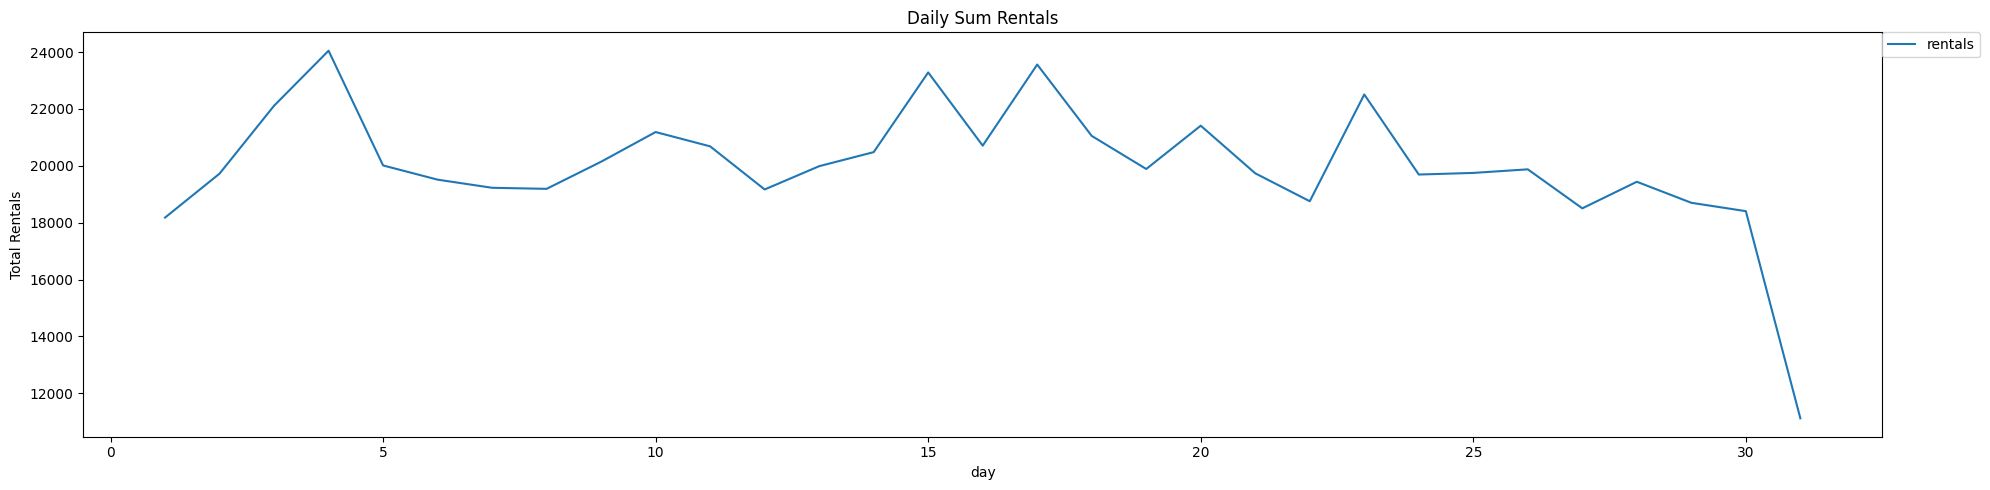

In [41]:
plt.figure(figsize=(20, 5))
grp_by_day['rentals'].plot()
plt.ylabel('Total Rentals')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('Daily Sum Rentals')
plt.tight_layout()
plt.show()

The rental sales increased spontaneously for the first 4 days of every month and continually maintain an havazard movement for the rest of the month with a sharp drop at the end of the month. 

In [42]:
grp_by_day = df_daily.groupby(df_daily['day']).mean()

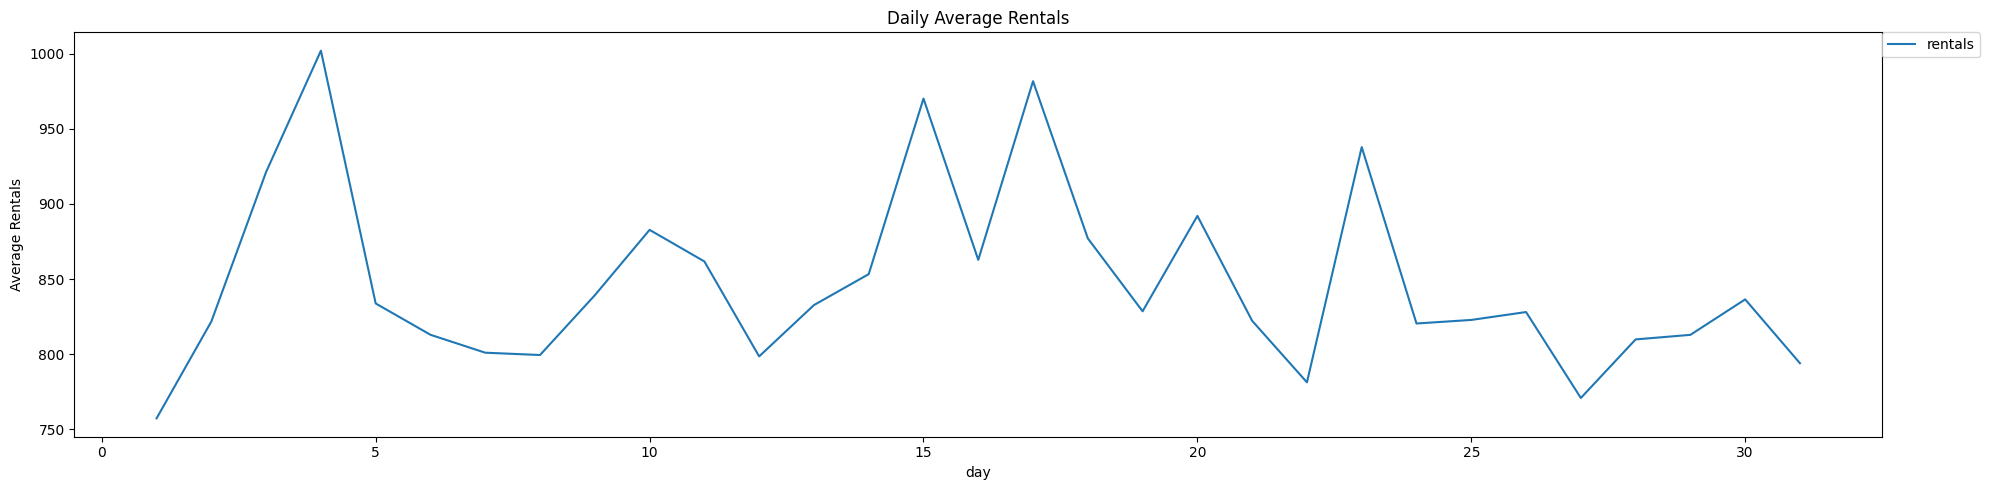

In [43]:
plt.figure(figsize=(20, 5))
grp_by_day['rentals'].plot()
plt.ylabel('Average Rentals')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('Daily Average Rentals')
plt.tight_layout()
plt.show()

The average daily rentals for the period is 1,000.

###### GroupBy `Month`

In [44]:
grp_by_mnth = df_daily.groupby(df_daily['mnth']).sum()

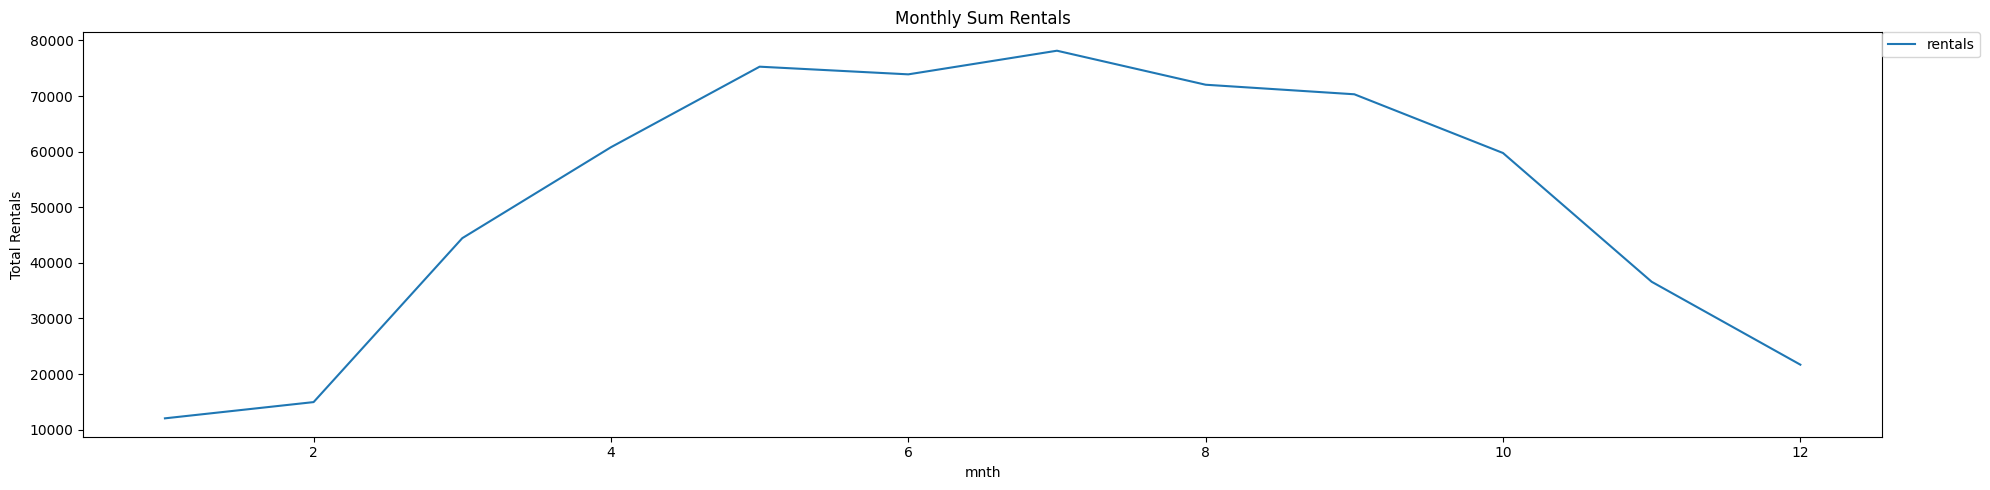

In [45]:
plt.figure(figsize=(20, 5))
grp_by_mnth['rentals'].plot()
plt.ylabel('Total Rentals')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('Monthly Sum Rentals')
plt.tight_layout()
plt.show()

In [45]:
grp_by_mnth = df_daily.groupby(df_daily['mnth']).mean()

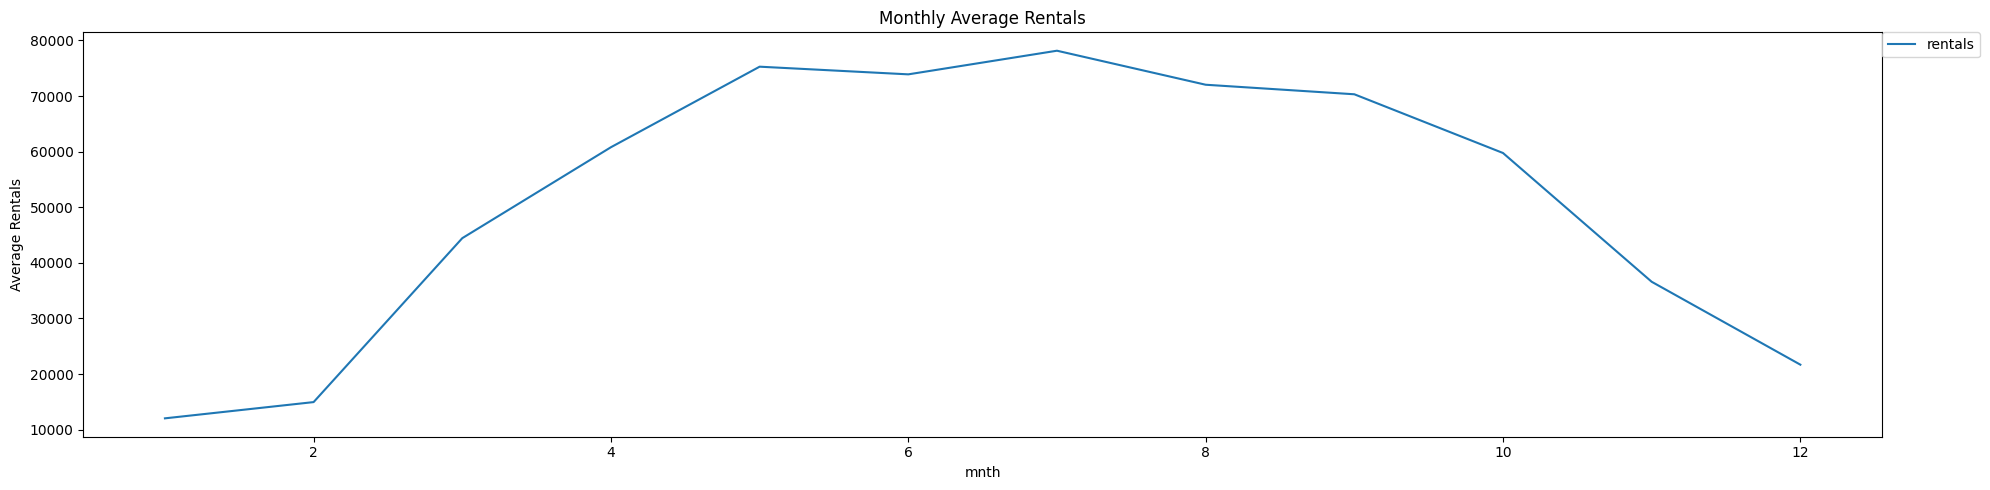

In [46]:
plt.figure(figsize=(20, 5))
grp_by_mnth['rentals'].plot()
plt.ylabel('Average Rentals')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('Monthly Average Rentals')
plt.tight_layout()
plt.show()

###### GroupBy `weekday`

In [47]:
grp_by_weekday = df_daily.groupby(df_daily['weekday']).sum()

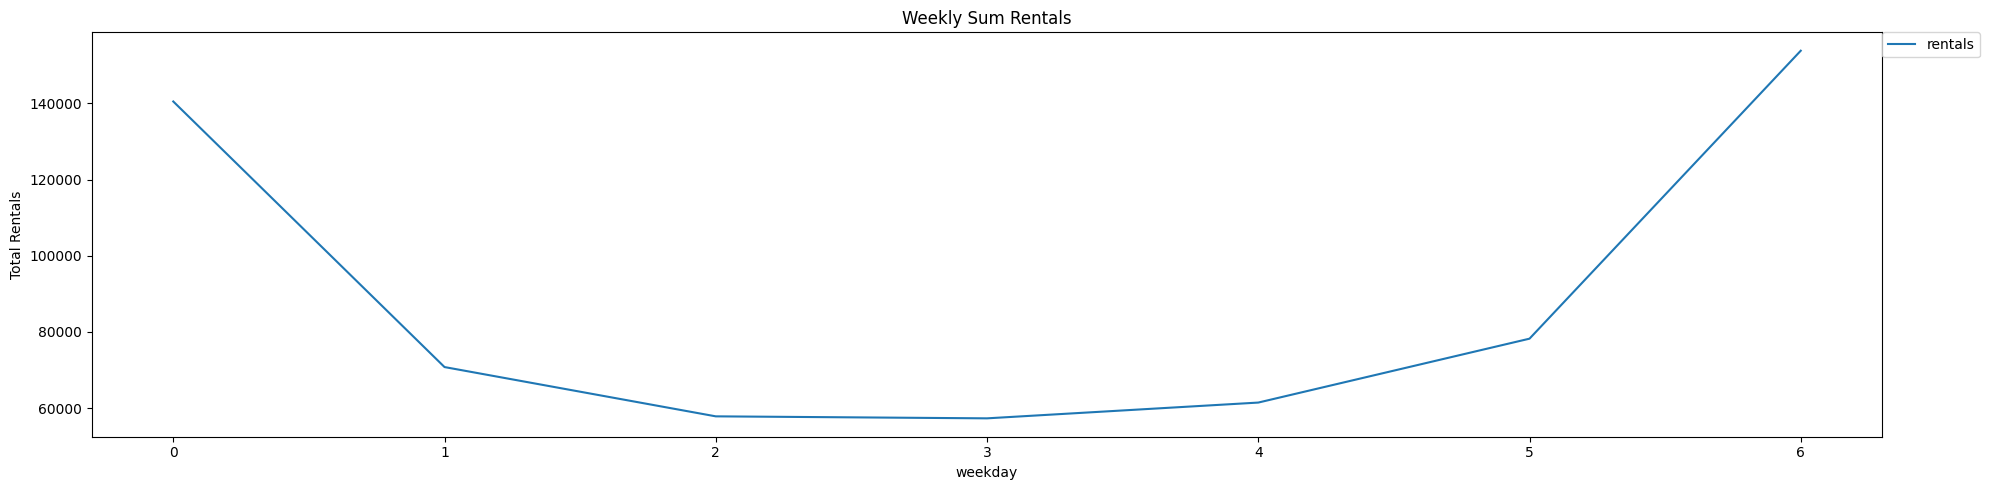

In [48]:
plt.figure(figsize=(20, 5))
grp_by_weekday['rentals'].plot()
plt.ylabel('Total Rentals')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('Weekly Sum Rentals')
plt.tight_layout()
plt.show()

In [49]:
grp_by_weekday = df_daily.groupby(df_daily['weekday']).mean()

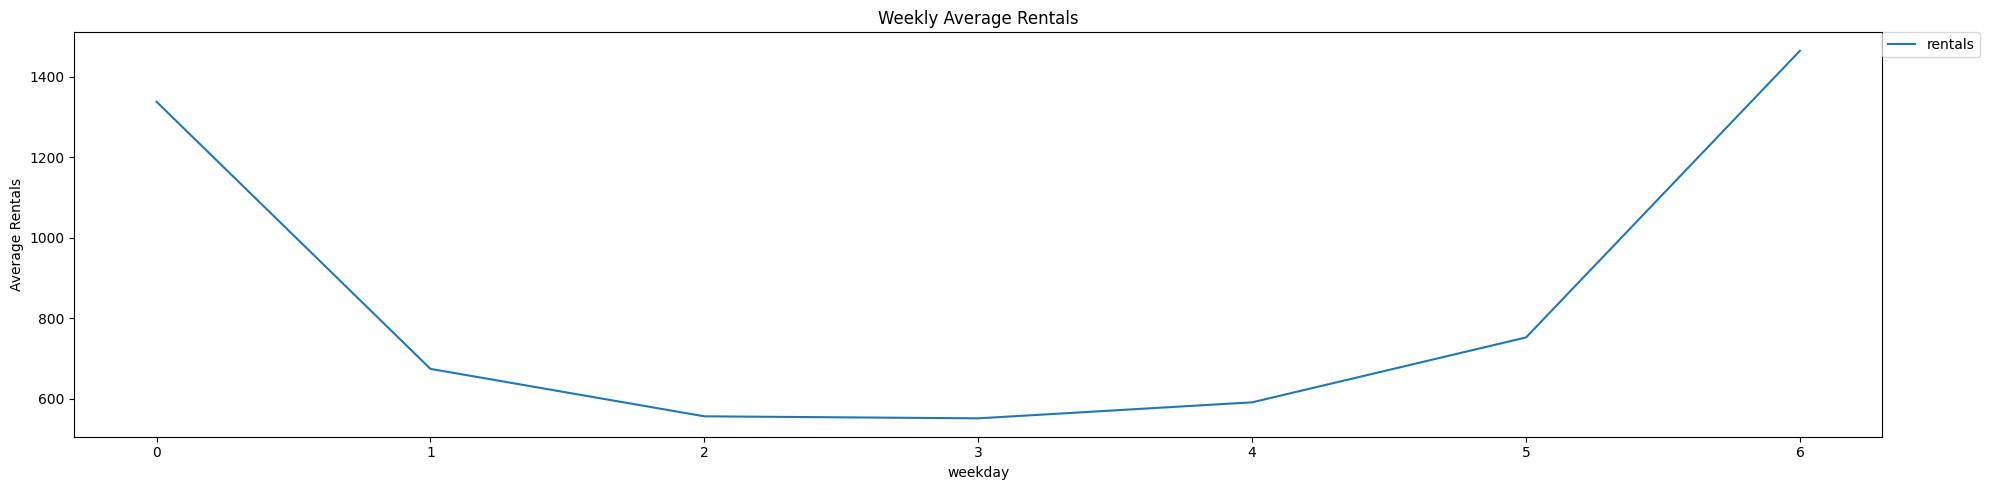

In [50]:
plt.figure(figsize=(20, 5))
grp_by_weekday['rentals'].plot()
plt.ylabel('Average Rentals')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.title('Weekly Average Rentals')
plt.tight_layout()
plt.show()

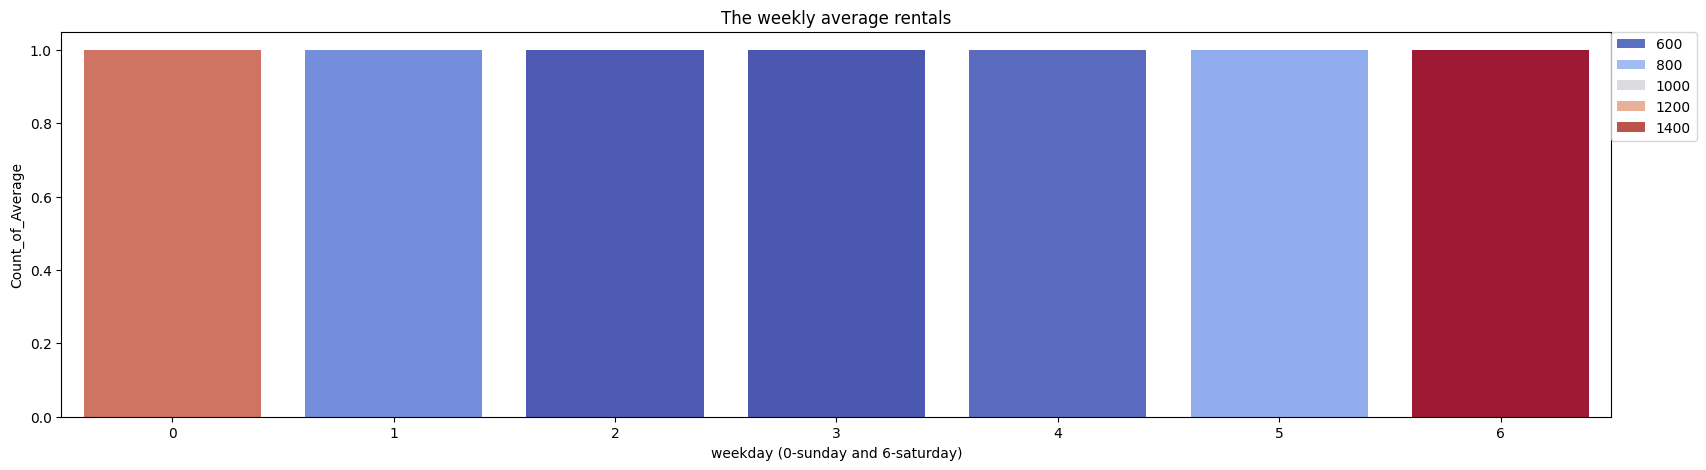

In [51]:
plt.figure(figsize=(20, 5))
sb.countplot(x='weekday', data=grp_by_weekday, hue='rentals', palette='coolwarm')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.xlabel('weekday (0-sunday and 6-saturday)')
plt.ylabel('Count_of_Average')
plt.title('The weekly average rentals')
plt.show()

## <font color = 'purple'> Predictive Analytics - Stochastic Model Development

In [52]:
df_daily.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day,year
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1,2011
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2,2011
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3,2011
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4,2011
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5,2011


###### Select the features and Target

In [53]:
help(ola.feature_target_selector)

Help on function feature_target_selector in module olanrewaju:

feature_target_selector(file, target_col)
    This function select features and target from a given DataFrame based on the target column specified.
    Inputs:
        file: This is the dataset in pandas dataframe.
        target_col: This is the specified target column name in strings.
    Outputs:
        file: This is the pandas dataframe for all the features selected.
        target: This is the pandas dataframe for the target selected.

    Please note: When calling the function, you will need to specify the name for your features and target and must be the outputs containers.



In [54]:
file = df_daily
target_col = 'rentals'
features, target = ola.feature_target_selector(file, target_col)

In [55]:
features.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,day,year
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,1,2011
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,2,2011
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,3,2011
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,4,2011
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,5,2011


In [56]:
target.head()

,rentals
0,331
1,131
2,120
3,108
4,82


##### Transform the Numerical Columns since all columns are numerical

In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

scaler = StandardScaler()
min_max = MinMaxScaler()
norm = Normalizer()

def all_num_transform(file):
    '''
    This function transform the numerical columns into transformed values using all the sklearn preprocessing libraries.
    This will transform the pandas dataframe first with minmax, standardscaler and then normalizer.
    Input:
        file: This is pandas dataframe containing ONLY the numerical columns.
    Output:
        This returns the transformed pandas dataframe for all numerical columns in the dataset.

    Please note: This maybe adopted depending on the choice of the dataset you are working with, especially when trying to observe the impact of all
                 the numerical transformers on the dataset.
    '''
    X = scaler.fit_transform(file)
    X = min_max.fit_transform(X)
    X = norm.fit_transform(X)
    X = pd.DataFrame(X, columns=list(file.columns))
    return X

In [58]:
file = features
num_df = all_num_transform(file)
num_df.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,day,year
0,0.0,0.0,0.0,0.661791,0.000000,0.330896,0.235048,0.247191,0.548374,0.188350,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.446393,0.338573,0.321885,0.639030,0.416230,0.029760,0.0
2,0.0,0.0,0.0,0.136014,0.816081,0.000000,0.139550,0.118193,0.366941,0.380082,0.054405,0.0
3,0.0,0.0,0.0,0.260938,0.782815,0.000000,0.137408,0.136718,0.475271,0.222552,0.078281,0.0
4,0.0,0.0,0.0,0.387227,0.774454,0.000000,0.161954,0.152690,0.347972,0.262650,0.103261,0.0


#### Target

In [59]:
target = target.reset_index(drop=True)
target.head()

,rentals
0,331
1,131
2,120
3,108
4,82


###### Concatenate the transformed data

In [72]:
cleaned_df = pd.concat([num_df, target], axis=1)
cleaned_df.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,day,year,rentals
0,0.0,0.0,0.0,0.661791,0.000000,0.330896,0.235048,0.247191,0.548374,0.188350,0.000000,0.0,331
1,0.0,0.0,0.0,0.000000,0.000000,0.446393,0.338573,0.321885,0.639030,0.416230,0.029760,0.0,131
2,0.0,0.0,0.0,0.136014,0.816081,0.000000,0.139550,0.118193,0.366941,0.380082,0.054405,0.0,120
3,0.0,0.0,0.0,0.260938,0.782815,0.000000,0.137408,0.136718,0.475271,0.222552,0.078281,0.0,108
4,0.0,0.0,0.0,0.387227,0.774454,0.000000,0.161954,0.152690,0.347972,0.262650,0.103261,0.0,82


###### Select features and target for the model

In [73]:
feat = cleaned_df.drop(columns=['rentals'])
targ = cleaned_df[['rentals']]

###### Convert to arrays as X and y - I decided to convert I can still use the feat and targ like that

In [74]:
X = feat.values
y = targ.values

###### Train_Test_Split

In [75]:
seed = 42
test_size = 0.1

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

###### Fit the model - A continous model - Our case is regression

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
num_estimators = 100

In [80]:
model = RandomForestRegressor(n_estimators=num_estimators, random_state=seed)
model

RandomForestRegressor(random_state=42)

In [81]:
model.fit(X_train, y_train)

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

###### Predict with the model

In [82]:
y_pred = model.predict(X_test)
y_pred[:5]

array([ 696.05,   95.34,  377.79, 2019.56,  839.06])

In [86]:
model.score(X_test, y_test)  # This is accuracy score for the case of classification problem which is the same as r2_score in regression.

0.8463758675649217

###### Evaluate the performance of the model

In [84]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

def reg_model_eval():
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"The mean_squared_error is {round(mse,2)}")
    print(f"The root_mean_squared_error is {round(rmse,2)}")
    print(f"The r2_score is {round(r2,4) * 100}%")

In [85]:
reg_model_eval()

The mean_squared_error is 67360.27
The root_mean_squared_error is 259.54
The r2_score is 84.64%


###### Saving the model

In [87]:
help(ola.saving_model_versions)

Help on function saving_model_versions in module olanrewaju:

saving_model_versions(main_dir, model, path, save_model_name, ext)
    This function save any predictive models into a pickle file.
    Inputs:
        main_dir: This is the parent folder for the project which is a string i.e the folder where the folder you want to save the model in is created.
        model: This is the predictive model used to train the data. Must be called without enclosing in quotation marks.
        path: This is the folder name where you want to save the model. Must be string.
        save_model_name: This is the name the model is saved with, also in strings. The user defines the name of choice.
        ext: This is the format the user want the model to be saved into. Because Joblib is the library used,
              we adopt '.pk' for pickle, also in   strings.
    Output:
        The function automatically save the model and print a statement that confirm that it is saved in the folder specified.



##### <font color = 'purple'> Model Inferencing

###### Load the saved model

In [89]:
import joblib

In [90]:
os.chdir(model_path)
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\bike_rentge_cost_prediction_project\\models'

In [91]:
prediction_model = joblib.load('daily_bike_model_v3_24-07-24 14-56-10.pkl')
prediction_model

RandomForestRegressor(random_state=42)

In [92]:
feat.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'day', 'year'],
      dtype='object')

In [93]:
sample = np.array([1, 6, 0, 3, 1, 3, 0.71, 0.23, 0.34, 0.122, 23, 2024]).reshape(1,12)
sample = scaler.transform(sample)
sample = min_max.transform(sample)
sample = norm.transform(sample)
print(sample)
prediction_model.predict(sample)[0]

[[0.         0.03457286 0.         0.03803015 0.0760603  0.0760603
  0.06168608 0.0150688  0.02659178 0.01561881 0.05577755 0.98878392]]


C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


315.56

##### Inferencing Pipeline

In [94]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
scaler
min_max
norm

def preprocessor_inference(season, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, day, year):

    cols = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'day', 'year']
    
    input_array = np.array([[season, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, day, year]])
    input_df = pd.DataFrame(
        input_array,
        columns=cols
    )
    num_data_transformed = scaler.transform(input_df)
    num_data_transformed = min_max.transform(num_data_transformed)
    num_data_transformed = norm.transform(num_data_transformed)
    num_df = pd.DataFrame(num_data_transformed, columns=input_df.columns)
    num_df_arr = num_df.values
    return input_df, num_df, num_df_arr

In [96]:
season = 1
mnth = 1
holiday = 0
weekday = 6
workingday = 0
weathersit = 2
temp = 0.344167
atemp = 0.363625
hum = 0.805833
windspeed = 0.160446
day = 1
year = 2011

input_df, df, dfarr = preprocessor_inference(season, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, day, year)
prediction_model.predict(dfarr)[0]

499.25

###### Prediction Pipelines

In [117]:
import os
import joblib
model_path = model_path
os.chdir(model_path)
model = joblib.load('daily_bike_model_v3_24-07-24 14-56-10.pkl')


def prediction_function(season, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, day, year):
    
    input_df, num_df, num_df_arr = preprocessor_inference(season, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, day, year)
    predictions = model.predict(num_df_arr)
    pred_df = pd.DataFrame(predictions, columns=['prediction'])
    pred_df = pd.concat([input_df, pred_df], axis=1)
    pred = predictions[0]
    
    return pred

In [118]:
season = 1
mnth = 1
holiday = 0
weekday = 6
workingday = 0
weathersit = 2
temp = 0.344167
atemp = 0.363625
hum = 0.805833
windspeed = 0.160446
day = 1
year = 2011

pred = prediction_function(season, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, day, year)

In [119]:
pred

499.25

###### <font color = 'purple'> Productionalizing the model using Gradio

In [120]:
feat.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'day', 'year'],
      dtype='object')

In [121]:
import gradio as gr

## <font color = 'purple'> Task 2

- A model that predict the number of registered and casual rentals each day.
- A classification model to predict binned volumes of rentals each day. Take bin as Low, Medium_Low, Medium_High and High.
- Implement gradio to serve the models.

In [125]:
bike_share.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [126]:
df_share = bike_share.copy()

In [127]:
df_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [128]:
df_share.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [129]:
df_share.duplicated().sum()

0

###### Features Engineering

In [130]:
type(df_share['dteday'].iloc[0])

str

In [131]:
df_share.hr.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [132]:
df_share.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [133]:
df_share.yr.unique()

array([0, 1], dtype=int64)

In [134]:
df_share.holiday.unique()

array([0, 1], dtype=int64)

In [135]:
df_share.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [136]:
df_share.workingday.unique()

array([0, 1], dtype=int64)

In [137]:
df_share.weathersit.unique()

array([1, 2, 3, 4], dtype=int64)

###### Convert `dteday` to standard time format

In [138]:
df_share['timestamp'] = pd.to_datetime(df_share['dteday'])
df_share.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,timestamp
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01


In [139]:
type(df_share['timestamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

###### Extract `day and year` from `timestamp`

In [140]:
df_share['day'] = df_share['timestamp'].apply(lambda day: day.day)
df_share['year'] = df_share['timestamp'].apply(lambda year: year.year)

In [141]:
df_share.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,timestamp,day,year
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01,1,2011
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01,1,2011


###### select useful columns

In [142]:
df_share.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'timestamp', 'day', 'year'],
      dtype='object')

In [143]:
unwanted_cols = ['instant', 'dteday', 'yr', 'timestamp']

In [144]:
file = df_share
columns = unwanted_cols
df_share = ola.dropping_columns(file, columns)

In [145]:
df_share.head(2)

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,year
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,2011
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,2011


#### <font color = 'purple'> Predictive Analytics - Stochastic Model Development

 **Task 2a: A model that predict the number of registered rentals for each day**

In [146]:
df_share.shape

(17379, 16)

In [147]:
df_share.describe().T

,count,mean,std,min,25%,50%,75%,max
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000
hum,17379.0,0.627229,0.192930,0.00,0.4800,0.6300,0.7800,1.0000


###### Select features and target

In [148]:
file = df_share
target_col = 'registered'
features, target = ola.feature_target_selector(file, target_col)

###### Transform numerical columns since all columns as numerical

In [149]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
min_max = MinMaxScaler()


def all_num_transform(file):
    '''
    This function transform the numerical columns into transformed values using all the sklearn preprocessing libraries.
    This will transform the pandas dataframe first with minmax, standardscaler and then normalizer.
    Input:
        file: This is pandas dataframe containing ONLY the numerical columns.
    Output:
        This returns the transformed pandas dataframe for all numerical columns in the dataset.

    Please note: This maybe adopted depending on the choice of the dataset you are working with, especially when trying to observe the impact of all
                 the numerical transformers on the dataset.
    '''
    X = scaler.fit_transform(file)
    X = min_max.fit_transform(X)
    X = pd.DataFrame(X, columns=list(file.columns))
    return X

In [150]:
file = features
num_df = all_num_transform(file)
num_df.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt,day,year
0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.224490,0.2879,0.81,0.0,0.008174,0.015369,0.0,0.0
1,0.0,0.0,0.043478,0.0,1.0,0.0,0.0,0.204082,0.2727,0.80,0.0,0.021798,0.039959,0.0,0.0
2,0.0,0.0,0.086957,0.0,1.0,0.0,0.0,0.204082,0.2727,0.80,0.0,0.013624,0.031762,0.0,0.0
3,0.0,0.0,0.130435,0.0,1.0,0.0,0.0,0.224490,0.2879,0.75,0.0,0.008174,0.012295,0.0,0.0
4,0.0,0.0,0.173913,0.0,1.0,0.0,0.0,0.224490,0.2879,0.75,0.0,0.000000,0.000000,0.0,0.0


In [151]:
target = target.reset_index(drop=True)
target.head()

,registered
0,13
1,32
2,27
3,10
4,1


##### Concatenate

In [152]:
df_reg = pd.concat([num_df, target], axis=1)
df_reg.head(2)

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,cnt,day,year,registered
0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.224490,0.2879,0.81,0.0,0.008174,0.015369,0.0,0.0,13
1,0.0,0.0,0.043478,0.0,1.0,0.0,0.0,0.204082,0.2727,0.80,0.0,0.021798,0.039959,0.0,0.0,32


###### Select features X and Target y for the model

In [153]:
feat = df_reg.drop(columns=['registered'])
targ = df_reg['registered']

###### Convert to arrays

In [154]:
X = feat.values
y = targ.values

###### Train_Test_Split

In [155]:
seed = 42
test_size = 0.1

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

###### Fit the model

In [157]:
from xgboost import XGBRegressor

In [158]:
model_reg = XGBRegressor(random_state=seed)
model_reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [159]:
model_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

###### Predict with the model

In [160]:
y_pred = model_reg.predict(X_test)
y_pred[:5]

array([245.96631  ,  83.002205 ,   3.0038652, 449.42825  ,   8.242552 ],
      dtype=float32)

###### Evaluate the model

In [161]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

def reg_model_eval():
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"The mean_squared_error is {round(mse,2)}")
    print(f"The root_mean_squared_error is {round(rmse,2)}")
    print(f"The r2_score is {round(r2,4) * 100}%")

In [162]:
reg_model_eval()

The mean_squared_error is 13.51
The root_mean_squared_error is 3.68
The r2_score is 99.94%


###### Saving the model that predict registered rentals

###### Model Inferencing

In [163]:
feat.columns

Index(['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'cnt',
       'day', 'year'],
      dtype='object')

In [170]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler
min_max

import os
import joblib

model_path = model_path
os.chdir(model_path)
model_reg = joblib.load('registered_rentals_model_20-07-24 21-27-21.pkl')

def preprocessor_inference(season, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, cnt, day, year):

    cols = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'cnt', 'day', 'year']
    
    input_array = np.array([[season, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, cnt, day, year]])
    input_df = pd.DataFrame(
        input_array,
        columns=cols
    )
    num_data_transformed = scaler.transform(input_df)
    num_data_transformed = min_max.transform(num_data_transformed)
    num_df = pd.DataFrame(num_data_transformed, columns=input_df.columns)
    num_df_arr = num_df.values
    return input_df, num_df, num_df_arr


def prediction_function(season, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, cnt, day, year):
    
    input_df, num_df, num_df_arr = preprocessor_inference(season, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, cnt, day, year)
    predictions = model_reg.predict(num_df_arr)
    pred_df = pd.DataFrame(predictions, columns=['prediction'])
    pred_df = pd.concat([input_df, pred_df], axis=1)
    pred = predictions[0]
    
    return pred

In [167]:
season = 1
mnth = 1
hr = 0
holiday = 0
weekday = 6
workingday = 0
weathersit = 2
temp = 0.344167
atemp = 0.363625
hum = 0.805833
windspeed = 0.160446
casual = 3
cnt = 13
day = 1
year = 2011

pred = prediction_function(season, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, cnt, day, year)

In [168]:
pred

10.080496

###### Productionalizing the model_reg using gradio

**Task 2b: Model that predict the number of casual rentals for each day**

In [173]:
df_share.head(2)

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,year
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,2011
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,2011


###### Preprocessing and model evaluation

In [174]:
file = df_share
target_col = 'casual'
features, target = ola.feature_target_selector(file, target_col)

file = features
num_df = all_num_transform(file)

target = target.reset_index(drop=True)

df_casual = pd.concat([num_df, target], axis=1)

feat = df_casual.drop(columns=['casual'])
targ = df_casual['casual']

X = feat.values
y = targ.values

seed = 42
test_size = 0.1
num_estimators = 100

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

from sklearn.ensemble import GradientBoostingRegressor

model_cas = GradientBoostingRegressor(n_estimators=num_estimators, random_state=seed)

model_cas.fit(X_train, y_train)

y_pred = model_cas.predict(X_test)

reg_model_eval()

The mean_squared_error is 95.05
The root_mean_squared_error is 9.75
The r2_score is 96.02000000000001%


###### Saving the model_casual

##### Model Inferencing for casual rentals

In [131]:
feat.columns

Index(['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'registered', 'cnt',
       'day', 'year'],
      dtype='object')

In [175]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler
min_max

import os
import joblib

model_path = model_path
os.chdir(model_path)
model_cas = joblib.load('casual_rentals_model_20-07-24 22-16-29.pkl')

def preprocessor_inference(season, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, registered, cnt, day, year):

    cols = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'registered', 'cnt', 'day', 'year']
    
    input_array = np.array([[season, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, registered, cnt, day, year]])
    input_df = pd.DataFrame(
        input_array,
        columns=cols
    )
    num_data_transformed = scaler.transform(input_df)
    num_data_transformed = min_max.transform(num_data_transformed)
    num_df = pd.DataFrame(num_data_transformed, columns=input_df.columns)
    num_df_arr = num_df.values
    return input_df, num_df, num_df_arr


def prediction_function(season, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, registered, cnt, day, year):
    
    input_df, num_df, num_df_arr = preprocessor_inference(season, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, registered, cnt, day, year)
    predictions = model_cas.predict(num_df_arr)
    pred_df = pd.DataFrame(predictions, columns=['prediction'])
    pred_df = pd.concat([input_df, pred_df], axis=1)
    pred = predictions[0]
    
    return pred

###### Productionalizing model_cas using gradio

### <font color = 'purple'> Task 2c: Classification Model

The task is to build a classification model to predict binned values of rentals each day. 

Taking bins as `Low, Medium_Low, Medium_High and High`.

I will leveraged on the cleaned dataset for `df_share` and apply the binning techniques to recategorize the cnt into low, medium_low, medium_high and high.

In [177]:
df_share.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,year
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,2011
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,2011
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,2011
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,2011
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,2011


In [178]:
df = df_share.copy()
df.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,year
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,2011
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,2011
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,2011
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,2011
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,2011


###### <font color = 'purple'> Binning

Binning is a process of transforming continuous numerical variables into discrete categorical `bins` for group analysis.

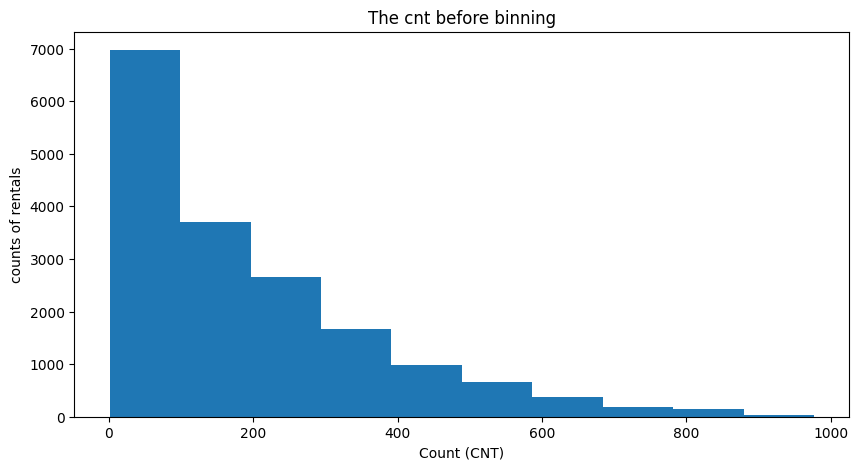

In [179]:
plt.figure(figsize=(10, 5))

plt.hist(df['cnt'])
plt.xlabel('Count (CNT)')
plt.ylabel('counts of rentals')
plt.title('The cnt before binning')
plt.show()

In [180]:
type(df['cnt'].iloc[0])

numpy.int64

###### Binning Techniques

Sinnce we need four categories, we binned into 5.

The categories are `low`, `medium_low`, `medium_high`, `high`

###### Determine the min, max of the dataset column

In [181]:
df['cnt'].max()

977

In [182]:
df['cnt'].min()

1

In [183]:
df['cnt'].nunique()

869

###### create the bins

In [184]:
bins = np.linspace(df['cnt'].min(), df['cnt'].max(), 5)
bins

array([  1., 245., 489., 733., 977.])

###### define the categories

In [185]:
category_names = ['low', 'medium_low', 'medium_high', 'high']

###### applying the `.cut()` methods in pandas to determine the categories based on the binned

In [186]:
df['cnt_binned'] = pd.cut(
    df['cnt'],
    bins,
    labels=category_names,
    include_lowest=True
)

In [187]:
df[['cnt', 'cnt_binned']].head()

,cnt,cnt_binned
0,16,low
1,40,low
2,32,low
3,13,low
4,1,low


In [188]:
df.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,year,cnt_binned
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,2011,low
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,2011,low
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,2011,low
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,2011,low
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,2011,low


In [189]:
df.cnt_binned.value_counts()

cnt_binned
low            12198
medium_low      3795
medium_high     1142
high             244
Name: count, dtype: int64

There is class imbalanced and need to be corrected.

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  int64   
 1   mnth        17379 non-null  int64   
 2   hr          17379 non-null  int64   
 3   holiday     17379 non-null  int64   
 4   weekday     17379 non-null  int64   
 5   workingday  17379 non-null  int64   
 6   weathersit  17379 non-null  int64   
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   hum         17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  cnt         17379 non-null  int64   
 14  day         17379 non-null  int64   
 15  year        17379 non-null  int64   
 16  cnt_binned  17379 non-null  category
dtypes: category(1), float64(4), int64(12)
memory usage: 2.1 MB


In [191]:
df['cnt_binned'] = df['cnt_binned'].astype('object')

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   mnth        17379 non-null  int64  
 2   hr          17379 non-null  int64  
 3   holiday     17379 non-null  int64  
 4   weekday     17379 non-null  int64  
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  int64  
 7   temp        17379 non-null  float64
 8   atemp       17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  casual      17379 non-null  int64  
 12  registered  17379 non-null  int64  
 13  cnt         17379 non-null  int64  
 14  day         17379 non-null  int64  
 15  year        17379 non-null  int64  
 16  cnt_binned  17379 non-null  object 
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


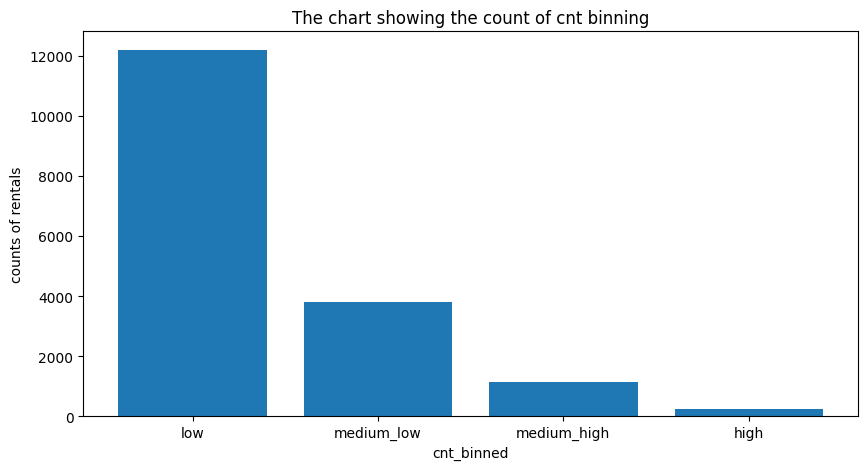

In [193]:
plt.figure(figsize=(10, 5))

plt.bar(category_names, df['cnt_binned'].value_counts())
plt.xlabel('cnt_binned')
plt.ylabel('counts of rentals')
plt.title('The chart showing the count of cnt binning')
plt.show()

This has been able to narrow the data for cnt from 869 to 4.

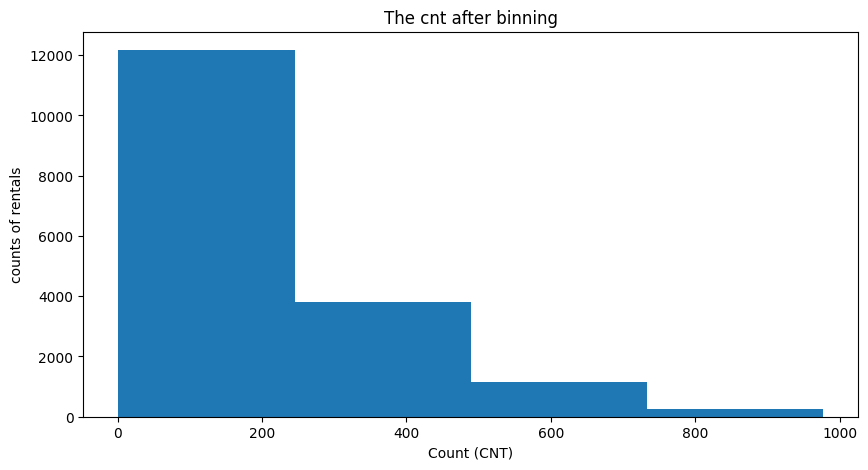

In [194]:
plt.figure(figsize=(10, 5))

plt.hist(df['cnt'], bins=4)
plt.xlabel('Count (CNT)')
plt.ylabel('counts of rentals')
plt.title('The cnt after binning')
plt.show()

#### The Classification Model build up - A multiclass Model

In [195]:
df.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,year,cnt_binned
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,2011,low
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,2011,low
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,2011,low
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,2011,low
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,2011,low


###### Select features and target

In [196]:
file = df
target_col = 'cnt_binned'
features, target = ola.feature_target_selector(file, target_col)

In [197]:
features.head(2)

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,year
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,2011
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,2011


In [198]:
target.head(2)

,cnt_binned
0,low
1,low


###### Transform numerical columns

In [199]:
file = features
num_df = all_num_transform(file)
num_df.head(2)

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,year
0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.224490,0.2879,0.81,0.0,0.008174,0.014673,0.015369,0.0,0.0
1,0.0,0.0,0.043478,0.0,1.0,0.0,0.0,0.204082,0.2727,0.80,0.0,0.021798,0.036117,0.039959,0.0,0.0


###### Encode the target column using label encoder

In [200]:
target = target.reset_index(drop=True)

In [201]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

def label_encoding(file):
    '''
    This function encodes categorical columns in pandas dataframe using sklearn preprocessing library LabelEncoder.
    Input:
        file: This is the pandas dataframe containing ONLY categorical columns.
    Output:
        It returns a fully encoded dataframe as ordered based on the labels in each columns for all the categorical columns.

    Please note: It is often useful when trying to encode a target columns that has binary or multiclass labels.
    '''
    file_encoded = label.fit_transform(file)
    file_encoded = pd.DataFrame(file_encoded, columns=file.columns)
    return file_encoded

In [202]:
file = target
label_df = label_encoding(file)
target = label_df.reset_index(drop=True)
target.head()

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,cnt_binned
0,1
1,1
2,1
3,1
4,1


###### Concatenate the dataset

In [203]:
df_class = pd.concat([num_df, target], axis=1)
df_class.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,year,cnt_binned
0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.224490,0.2879,0.81,0.0,0.008174,0.014673,0.015369,0.0,0.0,1
1,0.0,0.0,0.043478,0.0,1.0,0.0,0.0,0.204082,0.2727,0.80,0.0,0.021798,0.036117,0.039959,0.0,0.0,1
2,0.0,0.0,0.086957,0.0,1.0,0.0,0.0,0.204082,0.2727,0.80,0.0,0.013624,0.030474,0.031762,0.0,0.0,1
3,0.0,0.0,0.130435,0.0,1.0,0.0,0.0,0.224490,0.2879,0.75,0.0,0.008174,0.011287,0.012295,0.0,0.0,1
4,0.0,0.0,0.173913,0.0,1.0,0.0,0.0,0.224490,0.2879,0.75,0.0,0.000000,0.001129,0.000000,0.0,0.0,1


In [204]:
df_class['cnt_binned'].value_counts()

cnt_binned
1    12198
3     3795
2     1142
0      244
Name: count, dtype: int64

We need to correct the data imbalance in the target columns.

###### Selecting the features and target

In [205]:
feat = df_class.drop(columns=['cnt_binned'])
targ = df_class['cnt_binned']

###### Correct the data imbalance in the dataset - We adopte the SMOTEENN techniques - `Synthetic Minority OverSampling Techniques - Edited Nearest Neighbors`

In [206]:
from imblearn.combine import SMOTEENN

In [207]:
smoteenn = SMOTEENN()
smoteenn

SMOTEENN()

In [208]:
feat_enn, targ_enn = smoteenn.fit_resample(feat, targ)

In [209]:
targ_enn.value_counts()

cnt_binned
0    12198
2    12157
3    11240
1    10537
Name: count, dtype: int64

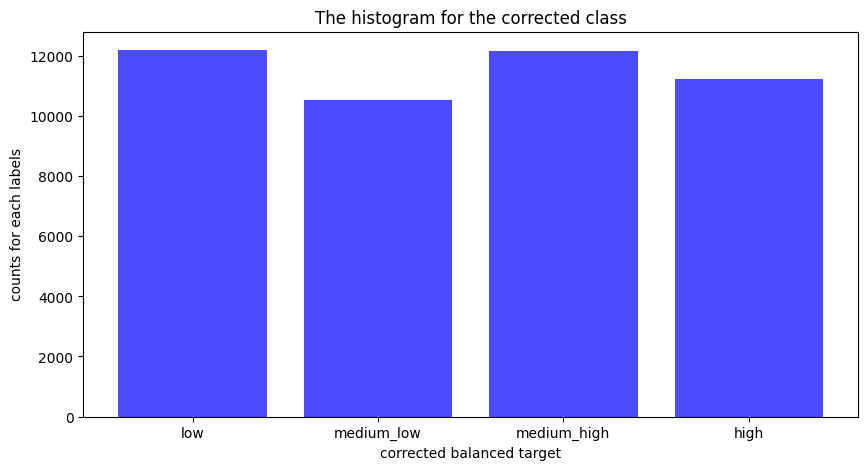

In [210]:
plt.figure(figsize=(10, 5))

plt.hist(targ_enn, bins=range(5), align='left', rwidth=0.8, color='blue', alpha=0.7)
plt.xlabel('corrected balanced target')
plt.ylabel('counts for each labels')
plt.title('The histogram for the corrected class')
plt.xticks(range(4), ['low', 'medium_low', 'medium_high', 'high'])
plt.show()

In [211]:
feat_enn.head(2)

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,year
0,0.0,0.181818,0.782609,0.0,0.333333,1.0,0.0,0.693878,0.6364,0.34,0.350888,0.261580,0.720090,0.751025,0.400000,1.0
1,0.0,0.181818,0.739130,0.0,0.500000,1.0,0.0,0.693878,0.6364,0.28,0.105325,0.381471,0.724605,0.800205,0.433333,1.0


In [212]:
targ_enn.head(2)

0    0
1    0
Name: cnt_binned, dtype: int32

###### Convert into arrays and Train_Test_Split

In [213]:
seed = 42
test_size = 0.1
num_estimators = 100

In [214]:
X = feat_enn.values
y = targ_enn.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [215]:
print(X_train.shape)

(41518, 16)


##### Train a Random Forest Classifier multiclass classification model

Random Forest Classifier can be used for multiclass classification problems by using the one-vs-all (also known as one-vs-rest) approach. 

In this approach, each class is treated as a separate binary classification problem, where the class of interest is treated as the positive class and all other classes are treated as the negative class.

In [216]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

In [217]:
rf_class = RandomForestClassifier(n_estimators=num_estimators, random_state=seed)
rf_class

RandomForestClassifier(random_state=42)

###### Wrapping the oneVsRestClassifier into the model instance

In [218]:
model_ovr = OneVsRestClassifier(rf_class)
model_ovr

OneVsRestClassifier(estimator=RandomForestClassifier(random_state=42))

###### Train the model

In [219]:
model_ovr.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(random_state=42))

###### Make the predictions with the model

In [220]:
y_pred = model_ovr.predict(X_test)
y_pred

array([1, 3, 2, ..., 0, 1, 0])

In [221]:
y_pred_df = pd.DataFrame(y_pred, columns=['cnt_binned'])
y_pred_df.head()

,cnt_binned
0,1
1,3
2,2
3,1
4,3


###### Evaluate the model

In [222]:
score = model_ovr.score(X_test, y_test)
#print(f'Test accuracy: {score:.2f}')
print(f'Test accuracy: {(score)*100}%')

Test accuracy: 100.0%


###### Confusion Matrix

In [223]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[1214,    0,    0,    0],
       [   0, 1106,    0,    0],
       [   0,    0, 1171,    0],
       [   0,    0,    0, 1123]], dtype=int64)

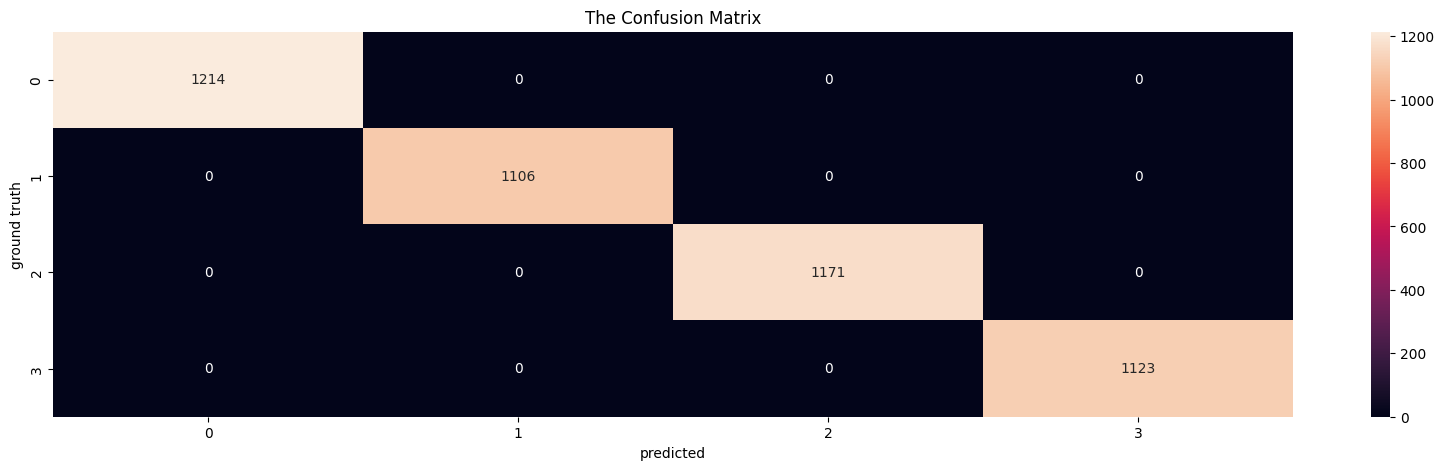

In [224]:
plt.figure(figsize=(20, 5))

sb.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('ground truth')
plt.title('The Confusion Matrix')
plt.show()

###### Saving the multiclass classification model

###### Classification Model Inferencing Pipeline

In [225]:
feat_enn.columns

Index(['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'day', 'year'],
      dtype='object')

###### <font color = 'purple'> Productionalization of the multiclass classification model using gradio

###### The classification model inferencing pipeline

In [231]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler
min_max

import os
import joblib

model_path = model_path
os.chdir(model_path)
model_ovr = joblib.load('classification_model_rentals_21-07-24 00-48-58.pkl')


def prep_prediction_function(
    season, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt, day, year
):
    cols = [
        'season', 'mnth', 'hr', 'holiday',
        'weekday', 'workingday', 'weathersit', 'temp',
        'atemp', 'hum', 'windspeed', 'casual',
        'registered', 'cnt', 'day', 'year'
    ]
    labels = ['low', 'medium_low', 'medium_high', 'high']
    input = [season, mnth, hr, holiday,
             weekday, workingday, weathersit, temp,
             atemp, hum, windspeed, casual,
             registered, cnt, day, year]
    input_array = np.array(input).reshape(1, 16)
    num_data_transformed = scaler.transform(input_array)
    num_data_transformed = min_max.transform(num_data_transformed)
    num_df = pd.DataFrame(num_data_transformed, columns=cols)

    predictions = model_ovr.predict(num_df)
    
    if predictions[0] == 0:
        predicted_class = labels[0]
    elif predictions[0] == 1:
        predicted_class = labels[1]
    elif predictions[0] == 2:
        predicted_class = labels[2]
    else:
        predicted_class = labels[3]

    pred_df = pd.DataFrame({'predicted_outcome': [predictions[0]], 'rental_status': [predicted_class]}, columns=['predicted_outcome', 'rental_status'])
    
    return pred_df

###### <font color = 'green'> End of Project